In [1]:
import pandas as pd
import numpy as np

world = pd.read_csv("world_population.csv")

In [2]:
world.head()


,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [4]:
unique_values=world.stack().nunique()
unique_values

3453

In [5]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [10]:
population_columns=['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population']
world['total_5']=world[population_columns].sum(axis=1)
country_max=world.loc[world['total_5'].idxmax()]['Country']
country_max

'China'

In [11]:
world['2015 Population'].corr(world['2022 Population'])

0.9994919243030731

In [13]:
pop_cols=[col for col in world.columns if "Population" in col]
cont_pop=world.groupby('Continent')[pop_cols].mean()
cont_pop

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,World Population Percentage
Continent,,,,,,,,,
Africa,2.545588e+07,2.387144e+07,2.141970e+07,1.889820e+07,1.459837e+07,1.137696e+07,8.586032e+06,6.567175e+06,0.313509
Asia,9.632739e+07,9.495513e+07,8.916500e+07,8.908777e+07,8.058084e+07,4.864000e+07,4.027833e+07,4.383988e+07,1.183800
Europe,1.505537e+07,1.491584e+07,1.502745e+07,1.471228e+07,1.481769e+07,1.478520e+07,1.420000e+07,1.311848e+07,0.186600
North America,1.500740e+07,1.485591e+07,1.425960e+07,1.356802e+07,1.215174e+07,1.053166e+07,9.207334e+06,7.885865e+06,0.187750
Oceania,2.046386e+06,1.910149e+06,1.756664e+06,1.613164e+06,1.357512e+06,1.162775e+06,9.965322e+05,8.469683e+05,0.023913
South America,3.120119e+07,3.082357e+07,2.950960e+07,2.678940e+07,2.501589e+07,2.122474e+07,1.727064e+07,1.378194e+07,0.391429


<AxesSubplot:>

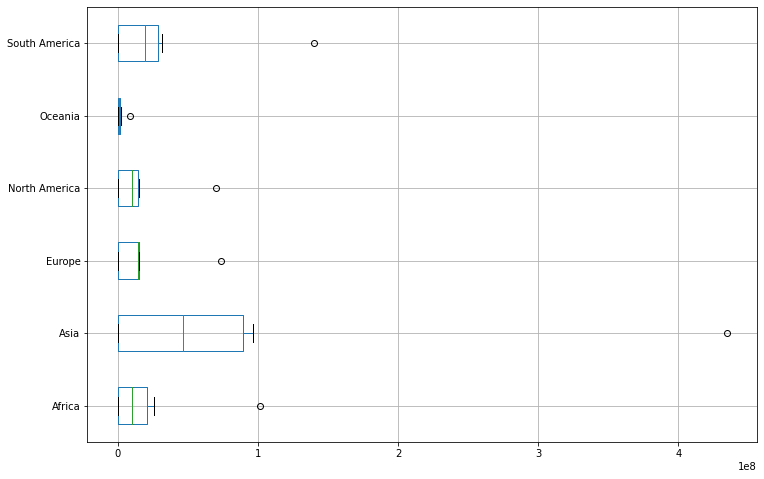

In [15]:
world.groupby('Continent').mean().T.boxplot(figsize=(12,8),vert=False)

<AxesSubplot:>

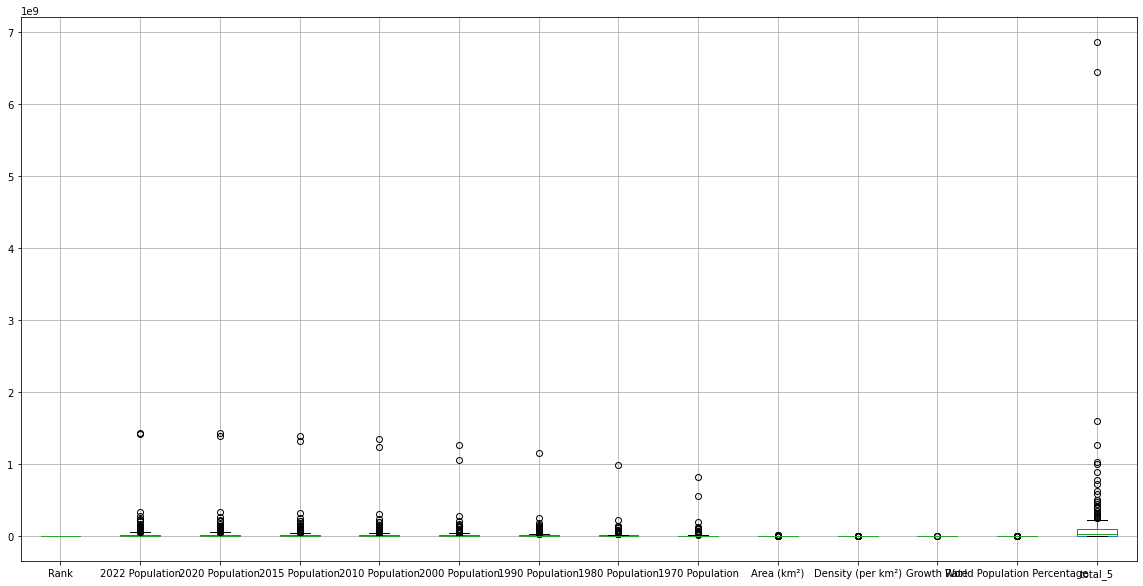

In [17]:
world.boxplot(figsize=(20,10))